### Space Titanic 

In [2]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (맥의 경우)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
train = pd.read_csv('/Users/macminim4/PyCharmMiscProject/Aiffel/jan/data/spaceship-titanic/train.csv')
test = pd.read_csv('/Users/macminim4/PyCharmMiscProject/Aiffel/jan/data/spaceship-titanic/test.csv')
sample_submission = pd.read_csv('/Users/macminim4/PyCharmMiscProject/Aiffel/jan/data/spaceship-titanic/sample_submission.csv')

print("데이터 로드 완료!")
print(f"Train 데이터 크기: {train.shape}")
print(f"Test 데이터 크기: {test.shape}")

데이터 로드 완료!
Train 데이터 크기: (8693, 14)
Test 데이터 크기: (4277, 13)


In [3]:
# Train 데이터의 첫 몇 행 확인
print("=" * 50)
print("Train 데이터 샘플")
print("=" * 50)
display(train.head(10))

print("\n" + "=" * 50)
print("데이터 기본 정보")
print("=" * 50)
train.info()

Train 데이터 샘플


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True



데이터 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
# 타겟 변수 분포 확인
print("=" * 50)
print("타겟 변수 (Transported) 분포")
print("=" * 50)
print(train['Transported'].value_counts())
print(f"\n비율:\n{train['Transported'].value_counts(normalize=True)}")

print("\n" + "=" * 50)
print("결측치 확인")
print("=" * 50)
missing = train.isnull().sum()
missing_pct = (train.isnull().sum() / len(train)) * 100
missing_df = pd.DataFrame({
    '결측치 개수': missing,
    '결측치 비율(%)': missing_pct
})
print(missing_df[missing_df['결측치 개수'] > 0].sort_values('결측치 개수', ascending=False))

타겟 변수 (Transported) 분포
Transported
True     4378
False    4315
Name: count, dtype: int64

비율:
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

결측치 확인
              결측치 개수  결측치 비율(%)
CryoSleep        217   2.496261
ShoppingMall     208   2.392730
VIP              203   2.335212
HomePlanet       201   2.312205
Name             200   2.300702
Cabin            199   2.289198
VRDeck           188   2.162660
FoodCourt        183   2.105142
Spa              183   2.105142
Destination      182   2.093639
RoomService      181   2.082135
Age              179   2.059128


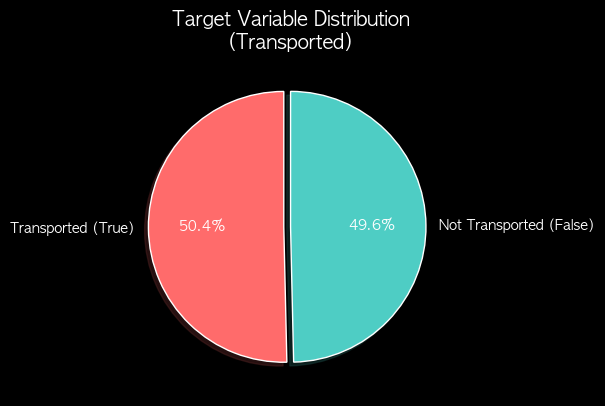

* 타겟 변수: 거의 균등한 분포 (50:50) - 클래스 불균형 없음,다른차원 이동 이 50.4%
* 결측치: 모든 feature에서 약 2% 내외로 비슷함


In [9]:
# 타겟 변수 분포 시각화 (Pie Chart)
plt.figure(figsize=(6, 6))

colors = ['#ff6b6b', '#4ecdc4']
transported_counts = train['Transported'].value_counts()

plt.pie(transported_counts, 
        labels=['Transported (True)', 'Not Transported (False)'],
        autopct='%1.1f%%',
        colors=colors,
        explode=(0.05, 0),
        startangle=90,
        shadow=True)
plt.title('Target Variable Distribution\n(Transported)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("* 타겟 변수: 거의 균등한 분포 (50:50) - 클래스 불균형 없음,다른차원 으로 이동이 50.4%")
print("* 결측치: 모든 feature에서 약 2% 내외로 비슷함")

다른 차원으로 이동 하는 승객과 과 이동하지 않은 비율이 거의 50:50으로 균등하게 나뉘어 있어서, 모델 학습 시 클래스 불균형 문제가 없을것으로 예상됨 

In [10]:
 # 수치형 변수 기술 통계
print("=" * 50)
print("수치형 변수 기술 통계")
print("=" * 50)
display(train.describe())

print("\n" + "=" * 50)
print("범주형 변수 unique 값 확인")
print("=" * 50)
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in categorical_cols:
    print(f"\n{col}:")
    print(train[col].value_counts())


수치형 변수 기술 통계


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000



범주형 변수 unique 값 확인

HomePlanet:
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

CryoSleep:
CryoSleep
False    5439
True     3037
Name: count, dtype: int64

Destination:
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

VIP:
VIP
False    8291
True      199
Name: count, dtype: int64


데이터 특성평가<br/>
범주형 변수 분석:

HomePlanet: Earth(53%), Europa(24%), Mars(20%) - 비교적 균형있음<br/>
CryoSleep: False(64%), True(36%) - 냉동수면 여부<br/>
Destination: TRAPPIST-1e가 압도적(69%) - 불균형<br/>
VIP: 극단적 불균형 (VIP는 2.4%에 불과) - 피처 중요도 낮을 가능성<br/>

수치형 변수 분석:

Age: 0~79세, 평균 28.8세
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: 소비 관련 피처들

대부분 0원 (중앙값 0) → 많은 승객이 소비 안함
최댓값이 매우 큼 → 이상치 존재 가능

In [11]:
# PassengerId 구조 분석
print("=" * 50)
print("PassengerId 구조 분석")
print("=" * 50)
print("샘플:")
print(train['PassengerId'].head(10))

# Cabin 구조 분석
print("\n" + "=" * 50)
print("Cabin 구조 분석")
print("=" * 50)
print("샘플:")
print(train['Cabin'].dropna().head(10))

# Cabin을 deck/num/side로 분리해보기
train['Deck'] = train['Cabin'].str.split('/').str[0]
train['Cabin_num'] = train['Cabin'].str.split('/').str[1]
train['Side'] = train['Cabin'].str.split('/').str[2]

print("\nDeck 분포:")
print(train['Deck'].value_counts())
print("\nSide 분포:")
print(train['Side'].value_counts())

PassengerId 구조 분석
샘플:
0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
5    0005_01
6    0006_01
7    0006_02
8    0007_01
9    0008_01
Name: PassengerId, dtype: object

Cabin 구조 분석
샘플:
0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object

Deck 분포:
Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

Side 분포:
Side
S    4288
P    4206
Name: count, dtype: int64


In [12]:
# PassengerId에서 그룹 정보 추출
train['Group'] = train['PassengerId'].str.split('_').str[0]
train['Group_num'] = train['PassengerId'].str.split('_').str[1]

# 그룹별 인원 수 계산
group_size = train.groupby('Group').size().reset_index(name='GroupSize')
train = train.merge(group_size, on='Group', how='left')

print("=" * 50)
print("그룹 크기 분포")
print("=" * 50)
print(train['GroupSize'].value_counts().sort_index())

print("\n혼자 vs 일행:")
print(f"혼자 여행: {(train['GroupSize'] == 1).sum()}명 ({(train['GroupSize'] == 1).sum()/len(train)*100:.1f}%)")
print(f"일행 있음: {(train['GroupSize'] > 1).sum()}명 ({(train['GroupSize'] > 1).sum()/len(train)*100:.1f}%)")

그룹 크기 분포
GroupSize
1    4805
2    1682
3    1020
4     412
5     265
6     174
7     231
8     104
Name: count, dtype: int64

혼자 vs 일행:
혼자 여행: 4805명 (55.3%)
일행 있음: 3888명 (44.7%)
